<a href="https://colab.research.google.com/github/haviet12/Artificial_Inteligent/blob/main/Detect_Face_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [3]:

### thay doi ti le anh tu 0->255 thanh 0->1
train = ImageDataGenerator(rescale =1.0/255.0)
test = ImageDataGenerator(rescale=1.0/255.0)

In [5]:
train_data = train.flow_from_directory('/content/drive/MyDrive/Face_Class_Data/Train', target_size=(30,40), class_mode='categorical')
val_data = test.flow_from_directory('/content/drive/MyDrive/Face_Class_Data/Valuation', target_size=(30,40), class_mode='categorical')

Found 149 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


In [6]:
print('train_index :', train_data.class_indices)
print('test_index:', val_data.class_indices)

train_index : {'Ha': 0, 'Hau': 1, 'Minh': 2}
test_index: {'Ha': 0, 'Hau': 1, 'Minh': 2}


In [12]:
model= Sequential()
## lop CNN1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(30,40,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN2
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN3
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

batch_size=128
epochs =30
classes =3

In [13]:
# chuyen du lieu tu CNN ve ANN ( 2 chieu ve 1 chieu)
model.add(Flatten())
##lop hidden1
model.add(Dense(256,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
# lop outpu
model.add(Dense(classes, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

In [15]:
history=model.fit(train_data,epochs=30,batch_size=128,verbose=1, 
                  validation_data=val_data)

Epoch 1/30
5/5 [==============================] - 58s 14s/step - loss: 0.9647 - accuracy: 0.4631 - val_loss: 0.6729 - val_accuracy: 0.7097
Epoch 2/30
5/5 [==============================] - 0s 83ms/step - loss: 0.3792 - accuracy: 0.9597 - val_loss: 0.0644 - val_accuracy: 1.0000
Epoch 3/30
5/5 [==============================] - 0s 89ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/30
5/5 [==============================] - 0s 94ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 0.9677
Epoch 5/30
5/5 [==============================] - 0s 87ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 1.0397e-04 - val_accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 0s 84ms/step - loss: 2.7413e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 0s 87ms/step - loss: 0.0076 - accuracy: 0.9933 - val_loss: 2.3073e-08 - val_accuracy: 1.0000
Epoch 8/30
5/5 

In [16]:

value=model.evaluate(train_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

loss 1.4958728570491076e-05
accuracy 1.0


<ipython-input-17-3d8c0ac85263>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


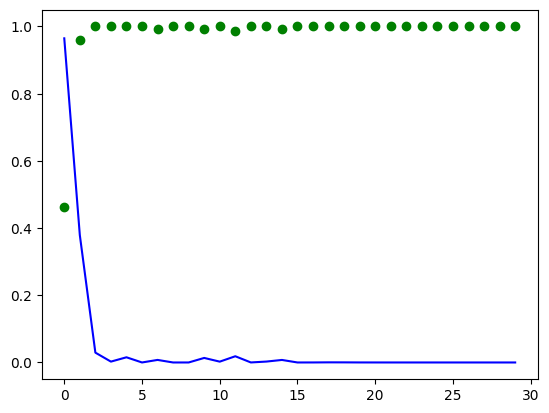

In [17]:
model.save('/content/drive/MyDrive/MyPicture/face_detect/model_face.h5')
accuracy =history.history['accuracy']
loss = history.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

1/1 [==============================] - 0s 222ms/step
Predicted:  Ha


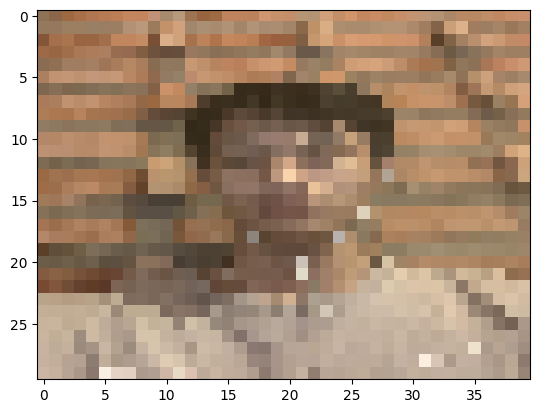

In [18]:
name_foods=['Ha','Hau','Minh']
filePath = '/content/drive/MyDrive/Face_Class_Data/ha.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(30,40))
arrayImage = img_to_array(testImage).reshape(1,30,40,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", name_foods[pred])
plt.imshow(testImage)
     